In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [3]:
with open(r"C:\Users\Akshat Choudhary\Desktop\traffic sign dataset\train.p",mode='rb') as training_data:
    train=pickle.load(training_data)
with open(r"C:\Users\Akshat Choudhary\Desktop\traffic sign dataset\valid.p",mode='rb') as validation_data:
    valid=pickle.load(validation_data)
with open(r"C:\Users\Akshat Choudhary\Desktop\traffic sign dataset\test.p",mode='rb') as testing_data:
    test=pickle.load(testing_data)

In [4]:
x_train,y_train=train['features'],train['labels']

In [5]:
x_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

In [7]:
x_validation,y_validation=valid['features'],valid['labels']

In [8]:
x_valid.shape

NameError: name 'x_valid' is not defined

In [10]:
x_test,y_test=test['features'],test['labels']

In [11]:
x_test.shape
y_test.shape

(12630,)

38

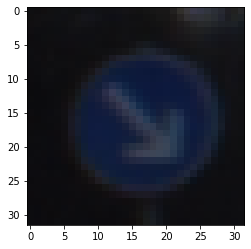

In [12]:
i=np.random.randint(1,len(x_train))
plt.imshow(x_train[i])
y_train[i]  #it gives label i.e 2 for 50km/h 


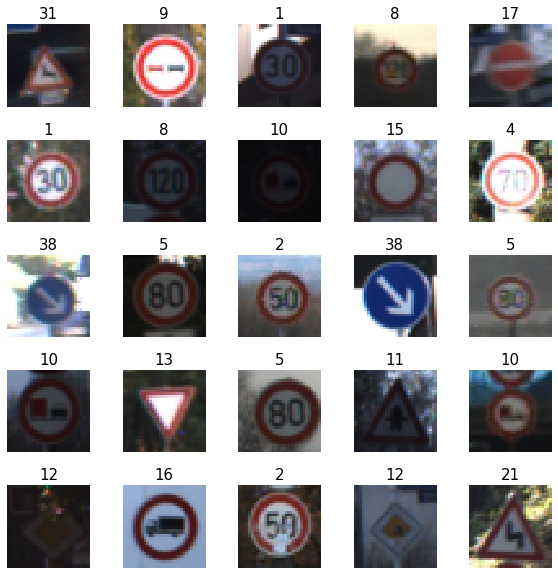

In [13]:
# lets view images in grid format of 5x5 which gives 25 images
W_grid=5
L_grid=5

#fig,axes=plt.subplot(W-grid,L_grid)
#subplot return the figure object and axis object

fig,axes=plt.subplots(L_grid,W_grid,figsize=(10,10))
axes=axes.ravel()# flatten the 5x5 dimension into 25 array
n_training=len(x_train)

for i in np.arange(0,W_grid*L_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index],fontsize=15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)
    
        


In [14]:
from sklearn.utils import shuffle
x_train,y_train=shuffle(x_train,y_train)

In [15]:
x_train_gray=np.sum(x_train/3,axis=3,keepdims=True)  #x_train is divide by 3 because images are coloured i.e rgb and we convert in grey
x_validation_gray=np.sum(x_validation/3,axis=3,keepdims=True)
x_test_gray=np.sum(x_test/3,axis=3,keepdims=True)


In [16]:
x_train_gray.shape

(34799, 32, 32, 1)

In [17]:
x_train_gray_norm=(x_train_gray-128)/128    #normalising the image so the value will be between basically 1&0
x_validation_gray_norm=(x_validation_gray-128)/128
x_test_gray_norm=(x_test_gray-128)/128

In [18]:
x_train_gray_norm

array([[[[-0.70052083],
         [-0.6953125 ],
         [-0.703125  ],
         ...,
         [-0.58072917],
         [-0.57291667],
         [-0.59114583]],

        [[-0.70572917],
         [-0.69270833],
         [-0.6953125 ],
         ...,
         [-0.6015625 ],
         [-0.58072917],
         [-0.59375   ]],

        [[-0.72916667],
         [-0.70833333],
         [-0.70833333],
         ...,
         [-0.59635417],
         [-0.59635417],
         [-0.61197917]],

        ...,

        [[-0.66927083],
         [-0.6484375 ],
         [-0.6171875 ],
         ...,
         [-0.62760417],
         [-0.61197917],
         [-0.6171875 ]],

        [[-0.07552083],
         [-0.06510417],
         [-0.05208333],
         ...,
         [-0.32291667],
         [-0.140625  ],
         [-0.09895833]],

        [[ 0.12239583],
         [ 0.13020833],
         [ 0.125     ],
         ...,
         [-0.16666667],
         [ 0.01041667],
         [ 0.07552083]]],


       [[[ 0.90104167],


In [19]:
x_validation_gray_norm

array([[[[-0.90364583],
         [-0.90885417],
         [-0.90885417],
         ...,
         [-0.90364583],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90364583],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90625   ],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        ...,

        [[-0.88020833],
         [-0.88802083],
         [-0.8828125 ],
         ...,
         [-0.90364583],
         [-0.89583333],
         [-0.89583333]],

        [[-0.86979167],
         [-0.87760417],
         [-0.86979167],
         ...,
         [-0.91145833],
         [-0.90364583],
         [-0.89583333]],

        [[-0.86197917],
         [-0.86979167],
         [-0.86197917],
         ...,
         [-0.90625   ],
         [-0.8984375 ],
         [-0.88802083]]],


       [[[-0.90104167],


In [20]:

x_test_gray_norm


array([[[[ 0.1171875 ],
         [ 0.10416667],
         [ 0.11458333],
         ...,
         [-0.07552083],
         [-0.04947917],
         [-0.16666667]],

        [[ 0.12760417],
         [ 0.1171875 ],
         [ 0.12760417],
         ...,
         [ 0.140625  ],
         [ 0.13020833],
         [ 0.11979167]],

        [[ 0.125     ],
         [ 0.13020833],
         [ 0.109375  ],
         ...,
         [ 0.15364583],
         [ 0.15885417],
         [ 0.14583333]],

        ...,

        [[ 0.09635417],
         [ 0.07552083],
         [ 0.08333333],
         ...,
         [ 0.09635417],
         [ 0.09375   ],
         [ 0.1171875 ]],

        [[ 0.08854167],
         [ 0.08333333],
         [ 0.06770833],
         ...,
         [ 0.08072917],
         [ 0.08854167],
         [ 0.09635417]],

        [[ 0.078125  ],
         [ 0.06510417],
         [ 0.09114583],
         ...,
         [ 0.09375   ],
         [ 0.09895833],
         [ 0.10416667]]],


       [[[-0.50520833],


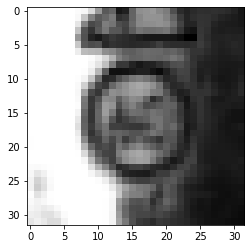

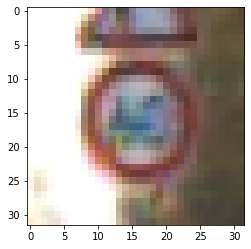

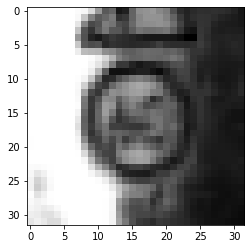

In [21]:
i=random.randint(1,len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(),cmap='gray')  #squeeze removes 1-D entities
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(),cmap='gray')


In [22]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(6,(5,5),activation='relu',input_shape=(32,32,1)),
                         tf.keras.layers.AveragePooling2D(),
                         tf.keras.layers.Dropout(0.2),
                         tf.keras.layers.Conv2D(16,(5,5),activation='relu'),
                         tf.keras.layers.AveragePooling2D(),
                         
                         tf.keras.layers.Flatten(),
                         tf.keras.layers.Dense(120,activation='relu'),
                         tf.keras.layers.Dense(84,activation='relu'),
                         tf.keras.layers.Dense(43,activation='softmax')
                         
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

In [23]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
history=model.fit(x_train_gray_norm,y_train,batch_size=500,epochs=20,validation_data=(x_validation_gray_norm,y_validation),verbose=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================] - 7s 203us/sample - loss: 3.1099 - accuracy: 0.1918 - val_loss: 2.5121 - val_accuracy: 0.3395
Epoch 2/20
34799/34799 [==============================] - 7s 209us/sample - loss: 1.6731 - accuracy: 0.5248 - val_loss: 1.3329 - val_accuracy: 0.6147
Epoch 3/20
34799/34799 [==============================] - 8s 217us/sample - loss: 1.0711 - accuracy: 0.6929 - val_loss: 0.9705 - val_accuracy: 0.7345
Epoch 4/20
34799/34799 [==============================] - 8s 224us/sample - loss: 0.8243 - accuracy: 0.7655 - val_loss: 0.8466 - val_accuracy: 0.7726
Epoch 5/20
34799/34799 [==============================] - 8s 225us/sample - loss: 0.6884 - accuracy: 0.8007 - val_loss: 0.7068 - val_accuracy: 0.8104
Epoch 6/20
34799/34799 [==============================] - 8s 225us/sample - loss: 0.5832 - accuracy: 0.8336 - val_loss: 0.6911 - val_accuracy: 0.7923
Epoch 7/20
34799/34799 [===========================

In [25]:
#testing the data with our model

score=model.evaluate(x_test_gray_norm,y_test)
print('Test Accuracy:{}'.format(score[1]))

12630/12630 [==============================] - 1s 92us/sample - loss: 0.6957 - accuracy: 0.8633
Test Accuracy:0.8633412718772888


In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
accuracy=history.history['accuracy']
loss=history.history['loss']
val_accuracy=history.history['val_accuracy']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

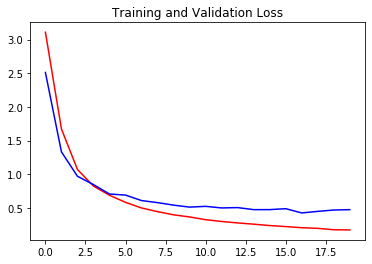

In [28]:
epochs=range(len(accuracy))
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')

Text(0.5, 1.0, 'Training and Validation Accuracy')

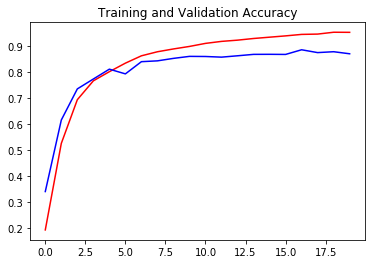

In [29]:
plt.plot(epochs,accuracy,'r',label="Training Accuracy")
plt.plot(epochs,val_accuracy,'b',label="Validation Accuracy")
plt.title("Training and Validation Accuracy")

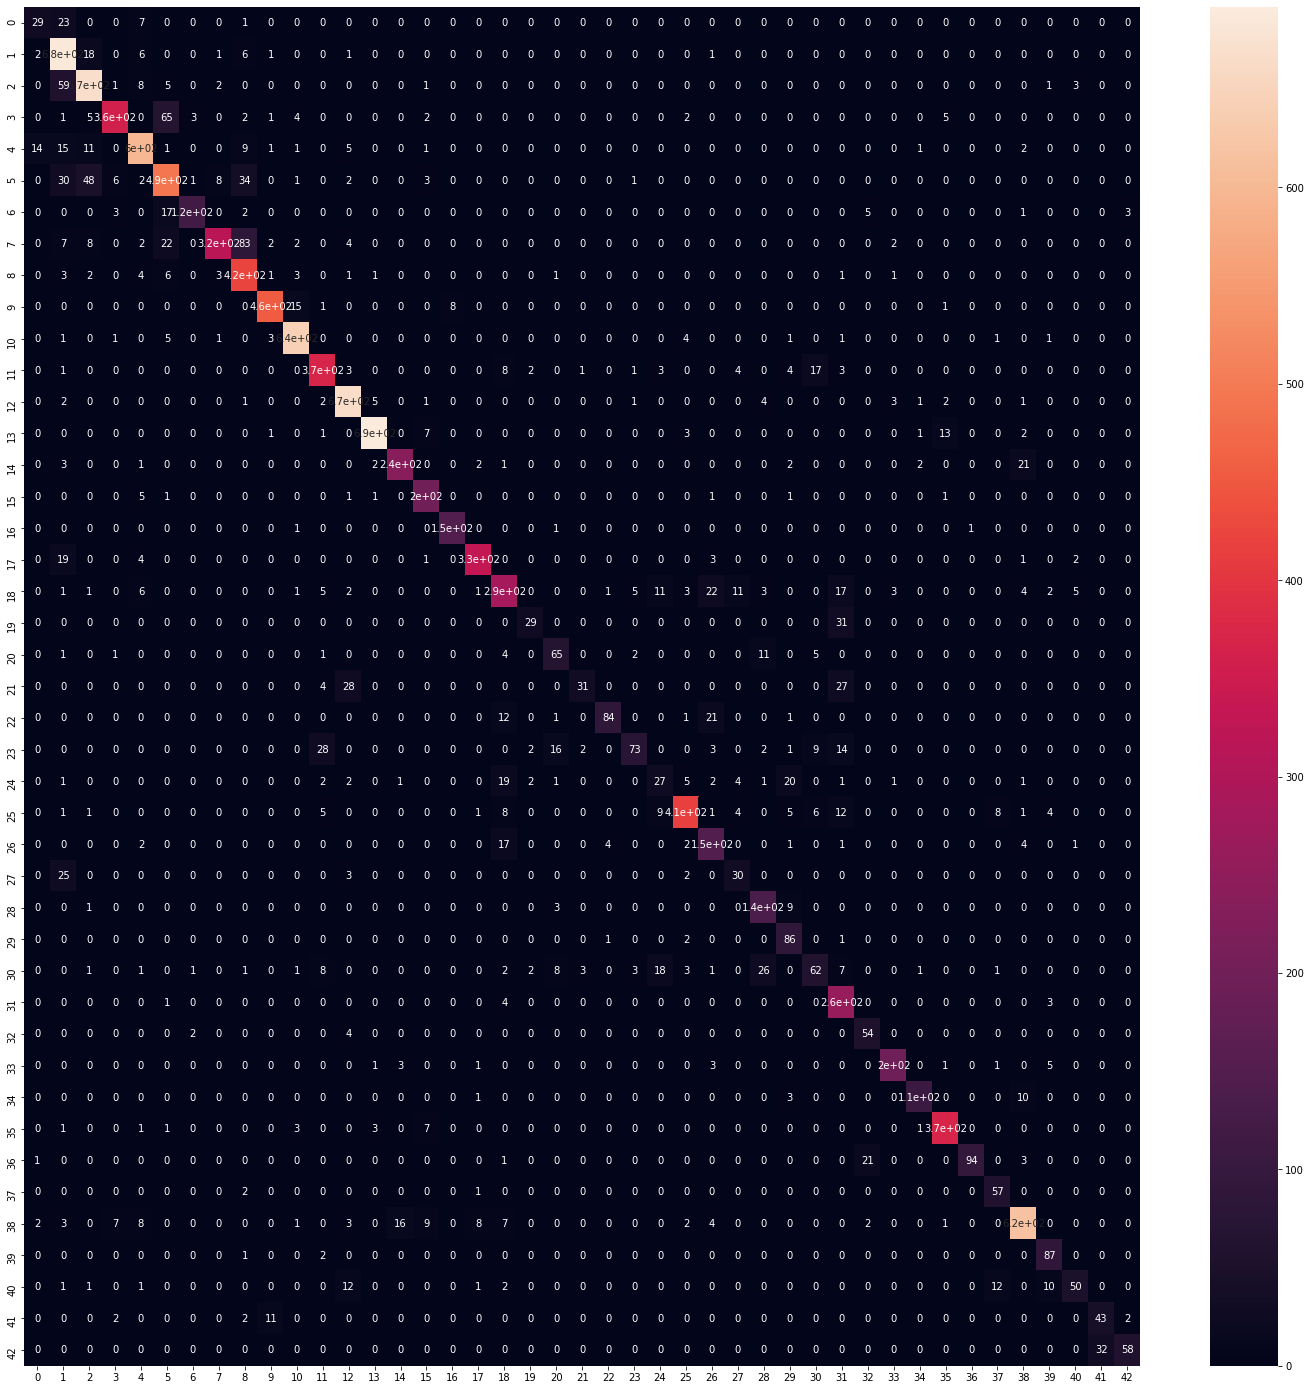

In [31]:
predicted_classes=model.predict_classes(x_test_gray_norm)
y_true=y_test
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)


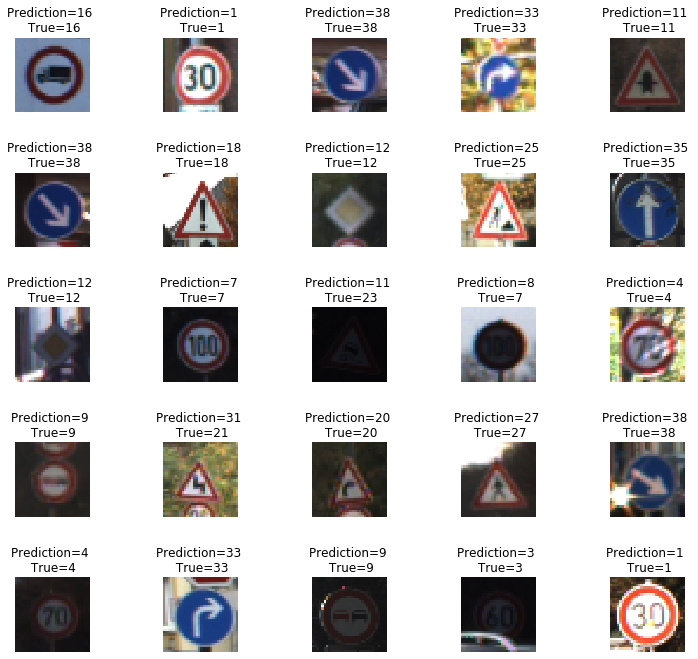

In [39]:
L=5
W=5
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction={} \n True={}'.format(predicted_classes[i],y_true[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)